# 06/29/20 - This notebook takes stellar masses from the GAMA "StellarMassesLambdar" to revise all catalogs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import constants as const
from astropy.io import fits
import astropy.units as u
c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
from astropy.cosmology import FlatLambdaCDM, z_at_value
cosmo = FlatLambdaCDM(h0,Om0=0.262)

In [2]:
# create datapaths for files and figures
csv_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/'
png_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/'
pdf_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/lambdar_revisions/'

In [3]:
spec_in = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_latest.csv')
mac_in = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_latest.csv')
zoo_in = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_latest.csv')

# Bring in the Lambdar masses.

In [4]:
# import lambdarstellarmasses
# Opening GAMA MagPhys data from G09, G12, and G15 (DR3)
hdul = fits.open('/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/StellarMassesLambdar.fits')  # open a FITS file
hdul.verify('fix')
masses = hdul[1].data  # assume the first extension is a table
print(masses.columns)

ColDefs(
    name = 'CATAID'; format = 'J'; null = -2147483648
    name = 'Z'; format = 'E'
    name = 'nQ'; format = 'I'; null = -32768
    name = 'SURVEY_CODE'; format = 'I'; null = -32768
    name = 'SURVEY_CLASS'; format = 'I'; null = -32768
    name = 'Z_TONRY'; format = 'E'
    name = 'fluxscale'; format = 'E'
    name = 'zmax_19p8'; format = 'E'
    name = 'zmax_19p4'; format = 'E'
    name = 'zmax_19p0'; format = 'E'
    name = 'zmax_17p8'; format = 'E'
    name = 'nbands'; format = 'E'
    name = 'S2N'; format = 'E'
    name = 'PPP'; format = 'E'
    name = 'logmstar'; format = 'E'; unit = 'dex(Msun)'
    name = 'dellogmstar'; format = 'E'; unit = 'dex(Msun)'
    name = 'logmoverl_i'; format = 'E'; unit = 'dex(Msun/Lsun,i)'
    name = 'dellogmoverl_i'; format = 'E'; unit = 'dex(Msun/Lsun,i)'
    name = 'logage'; format = 'E'; unit = 'dex(yr)'
    name = 'dellogage'; format = 'E'; unit = 'dex(yr)'
    name = 'logtau'; format = 'E'; unit = 'dex(yr)'
    name = 'dellogtau'; forma

In [5]:
# create dataframe of masses objects to compare to candidates
GAMA_ID = masses.CATAID.byteswap().newbyteorder()
logmstar = masses.logmstar.byteswap().newbyteorder()
logmintsfh = masses.logmintsfh.byteswap().newbyteorder()
logmremnants = masses.logmremnants.byteswap().newbyteorder()
fluxscale = masses.fluxscale.byteswap().newbyteorder()
dellogmintsfh = masses.dellogmintsfh.byteswap().newbyteorder()
z = masses.Z.byteswap().newbyteorder()

#masses_list = list(zip(GAMA_ID, logmstar, logmintsfh, logmremnants, fluxscale))

#masses_list
lambdar_masses = pd.DataFrame(
    {'GAMA_ID' : GAMA_ID,
#     'logmstar' : logmstar, 
     'lambdar_log_mstar' : logmintsfh,
    'lambdar_mstar' : 10**(logmintsfh),
    'lambdar_log_mstar_error': dellogmintsfh,
    'z': z}
) 
#     'logmremnants' : logmremnants, 
#     'fluxscale' : fluxscale})
lambdar_masses.GAMA_ID = lambdar_masses.GAMA_ID.astype(int)
lambdar_masses

,GAMA_ID,lambdar_log_mstar,lambdar_mstar,lambdar_log_mstar_error,z
0,6802,9.295552,1.974932e+09,0.149468,0.05054
1,6806,11.251878,1.785985e+11,0.111587,0.33124
2,6808,11.069718,1.174136e+11,0.109297,0.22936
3,6810,11.397855,2.499510e+11,0.106104,0.32630
4,6813,11.291913,1.958452e+11,0.113568,0.48457
...,...,...,...,...,...
120614,4341320,10.162766,1.454677e+10,0.190906,0.22847
120615,4342359,11.015234,1.035700e+11,0.136233,0.64610
120616,4345978,11.303544,2.011611e+11,0.109615,0.61111
120617,4347483,11.363264,2.308150e+11,0.115819,0.59604


In [6]:
print(spec_in.columns,
     mac_in.columns,
     zoo_in.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'GAMA_ID', 'RA', 'DEC', 'z_lens',
       'D_lens', 'D_source', 'magphys_mstar', 'lambdar_log_mstar',
       'lambdar_mstar', 'lambdar_log_mstar_error', 'm_half_re', 'sigma_star',
       'theta_e_pm', 'theta_e_sis'],
      dtype='object') Index(['Unnamed: 0', 'Unnamed: 0.1', 'GAMA_ID', 'RA', 'DEC', 'score', 'z',
       'magphys_mstar', 'lambdar_log_mstar', 'lambdar_mstar',
       'lambdar_log_mstar_error', 'm_half_re', 'sigma_star', 'D_lens',
       'theta_e_pm', 'theta_e_sis'],
      dtype='object') Index(['Unnamed: 0', 'Unnamed: 0.1', 'GAMA_ID', 'RA', 'DEC', 'score', 'z',
       'magphys_mstar', 'lambdar_log_mstar', 'lambdar_mstar',
       'lambdar_log_mstar_error', 'm_half_re', 'sigma_star', 'D_lens',
       'theta_e_pm', 'theta_e_sis'],
      dtype='object')


# Take only the basic info from the current candidate catalogs. Rename columns for consistency.

In [7]:
# take basic info 
spec_base = spec_in[ ['GAMA_ID',
                'RA',
                'DEC',
                'z_lens',
                'D_lens',
                'D_source',
                'STELLAR_MASS']
              ]
mac_base = mac_in[ ['GAMA_ID',
                'RA',
                'DEC',
               'SCORE',
                'Z',
                'STELLAR_MASS']
            ]
zoo_base = zoo_in[ ['GAMA_ID',
                'RA',
                'DEC',
               'LENS_SCORE',
                'Z',
                'STELLAR_MASS']
            ]
# rename stellar_mass
spec_base.rename(columns = {'STELLAR_MASS':'magphys_mstar'},
           inplace=True
           )
mac_base.rename(columns = {'SCORE':'score',
                     'Z':'z',
                     'STELLAR_MASS':'magphys_mstar'},
          inplace = True
          )
zoo_base.rename(columns = {'LENS_SCORE':'score',
                     'Z':'z',
                     'STELLAR_MASS':'magphys_mstar'},
          inplace=True
          )
print(spec_base.columns,
     mac_base.columns,
     zoo_base.columns)

KeyError: "['STELLAR_MASS'] not in index"

# Merge with lambdar_masses

In [8]:
# now merge with lambdar_masses
spec = pd.merge(
    spec_base, 
    lambdar_masses, 
    how = 'left', 
    on = 'GAMA_ID')

mac = pd.merge(
    mac_base, 
    lambdar_masses, 
    how = 'left', 
    on = 'GAMA_ID')

zoo = pd.merge(
    zoo_base, 
    lambdar_masses, 
    how = 'left', 
    on = 'GAMA_ID')

print(spec.columns,
     mac.columns,
     zoo.columns)

Index(['GAMA_ID', 'RA', 'DEC', 'z_lens', 'D_lens', 'D_source', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error'],
      dtype='object') Index(['GAMA_ID', 'RA', 'DEC', 'score', 'z', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error'],
      dtype='object') Index(['GAMA_ID', 'RA', 'DEC', 'score', 'z', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error'],
      dtype='object')


NameError: name 'spec' is not defined

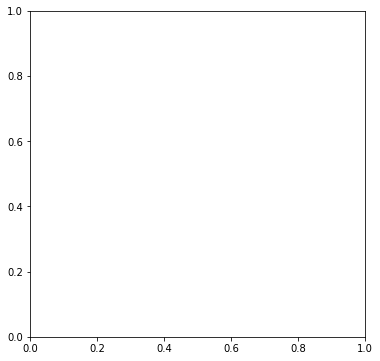

In [8]:
 # plot stellar mass by sfh for lambdar and magphys
x = np.linspace(0, 12, 100)
    
fig = plt.figure(figsize=(6,6))
ax = fig.subplots()
ax.scatter(spec.magphys_mstar/10**11,
            spec.lambdar_mstar/10**11,
          label='GAMA Spectroscopy Candidates',
          color = 'b')
ax.scatter(mac.magphys_mstar/10**11,
            mac.lambdar_mstar/10**11,
           label='LinKS Machine Learning Candidates',
          color = 'g')
ax.scatter(zoo.magphys_mstar/10**11,
            zoo.lambdar_mstar/10**11,
           label='GalaxyZoo Citizen Science Candidates',
          color = 'y')
ax.set_xlabel('MagPhys $M_*/ 10^{11} M_\odot$)')
ax.set_ylabel('Lambdar ($M_*/ 10^{11} M_\odot$)')
ax.set_ylim(0, 12)
ax.set_xlim(0, 12)
ax.plot(x, x, 
        color='k',
       linestyle='--')
ax.plot(x, 2*x, 
        color='k',
       linestyle='--')
ax.legend()
plt.title('Stellar Mass from SFH - Lambdar vs MagPhys')

#plt.savefig(f'{png_path}/lambdar_vs_magphys.png')

# Add M_re/2 to M* relation... (Auger 2010)
$M_{r_e/2} = 0.0011(M_*)^{1.25}$

In [10]:
spec['m_half_re'] = 0.0011 * (spec.lambdar_mstar) ** (1.25)
mac['m_half_re'] = 0.0011 * (mac.lambdar_mstar) ** (1.25)
zoo['m_half_re'] = 0.0011 * (zoo.lambdar_mstar) ** (1.25)

print(spec.columns,
     mac.columns,
     zoo.columns)

Index(['GAMA_ID', 'RA', 'DEC', 'z_lens', 'D_lens', 'D_source', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error',
       'm_half_re'],
      dtype='object') Index(['GAMA_ID', 'RA', 'DEC', 'score', 'z', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error',
       'm_half_re'],
      dtype='object') Index(['GAMA_ID', 'RA', 'DEC', 'score', 'z', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error',
       'm_half_re'],
      dtype='object')


# Add sigma to M* relations... (Zahid 2016)
# $\sigma(M_*) = \sigma_b * (M_* / M_b)^{\alpha}$
## For z < 0.2: (SDSS fit)
### $\sigma = 10^{2.073} (M_*/ 10^{10.26} M_{\odot})^{\alpha}$
### where $\alpha = 0.403$ if $M_* <= 10^{10.26}$, or $\alpha = 0.293$ otherwise
## For z > 0.2: (SHELS fit)
### $\sigma = 10^{2.071} (M_* / 10^{10.26} M_{\odot})^{0.281}$


In [11]:
# create velocity disperions estimator
def calculate_sigma (z, mass):
    mb = 10**(10.26)
    if z < 0.2: # SDSS fit
        sigma_b = 10**(2.073)
        if mass < mb:
            alpha = 0.403
        else:
            alpha = 0.293
        sigma = sigma_b * ( mass / mb ) ** (alpha)
    elif (z >= 0.2) & (z < 0.7): # SHELS fit
        sigma_b = 10**(2.071)
        alpha = 0.281
        sigma = sigma_b * ( mass / mb ) ** (alpha)
    else:
        print(f'Redshift out of range. {z}')
        sigma_b = 10**(2.071)
        alpha = 0.281
        sigma = sigma_b * ( mass / mb ) ** (alpha)
    return sigma

In [12]:
# define function to calculate from dataframe
def calculate_sigmas (z, mass):
    sigmas = []
    for i in range(len(z)):
        sigma = calculate_sigma(z[i], mass[i])
        sigmas.append(sigma)
    return sigmas

In [13]:
spec['sigma_star'] = calculate_sigmas(z= spec.z_lens, mass = spec.lambdar_mstar)
mac['sigma_star'] = calculate_sigmas(z = mac.z, mass = mac.lambdar_mstar)
zoo['sigma_star'] = calculate_sigmas(z = zoo.z, mass = zoo.lambdar_mstar)

print(spec.columns,
     mac.columns,
     zoo.columns)

Redshift out of range. 0.7215999960899353
Index(['GAMA_ID', 'RA', 'DEC', 'z_lens', 'D_lens', 'D_source', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error',
       'm_half_re', 'sigma_star'],
      dtype='object') Index(['GAMA_ID', 'RA', 'DEC', 'score', 'z', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error',
       'm_half_re', 'sigma_star'],
      dtype='object') Index(['GAMA_ID', 'RA', 'DEC', 'score', 'z', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error',
       'm_half_re', 'sigma_star'],
      dtype='object')


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib

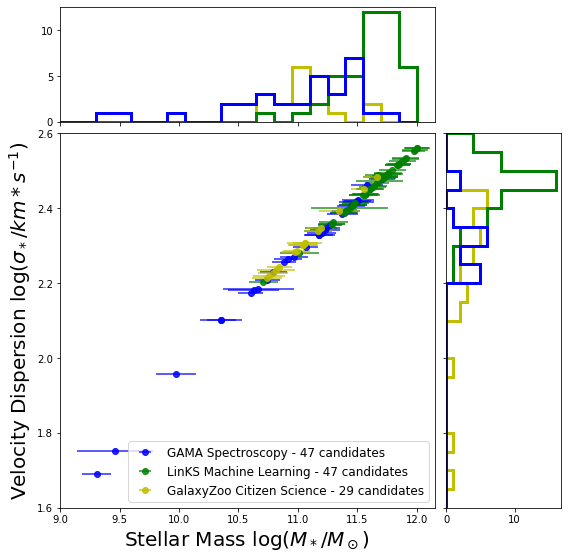

In [14]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plots
axScatter.set_xlim(8.65,12.15)
axScatter.set_ylim(1.5,2.5)

axScatter.errorbar(spec.lambdar_log_mstar, np.log10(spec.sigma_star), 
               label='GAMA Spectroscopy - 47 candidates', alpha = 0.85,
               xerr=spec.lambdar_log_mstar_error, fmt='o', color = 'b')

axScatter.errorbar((mac.lambdar_log_mstar), np.log10(mac.sigma_star), 
               label='LinKS Machine Learning - 47 candidates', alpha = 0.85,
               xerr=mac.lambdar_log_mstar_error, fmt='o', color= 'g')

axScatter.errorbar((zoo.lambdar_log_mstar), np.log10(zoo.sigma_star), 
               label='GalaxyZoo Citizen Science - 29 candidates', alpha = 0.85,
               xerr=zoo.lambdar_log_mstar_error, fmt='o', color = 'y')

# plot two overlaps
#G136604 = mac[mac.GAMA_ID == 136604]
#G124486 = mac[mac.GAMA_ID == 124486]
#axScatter.plot((G136604.lambdar_log_mstar), np.log(G136604.sigma_star), 'ks', label='Overlap ML/GZ - G136604', fillstyle = 'none')
#axScatter.plot((G124486.lambdar_log_mstar), np.log(G124486.sigma_star), 'kD', label='Overlap ML/GZ - G124486', fillstyle = 'none')

#axScatter.plot(9.5,0.4, 'ko')
#ax.errorbar(spec.magphys_mstar/10**11,
#            spec.lambdar_mstar/10**11,
#            yerr=10**(spec.lambdar_log_mstar_error)/10**11,
#           fmt='o')

axScatter.legend(loc='best', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20

axScatter.axis([9,12.15,1.6,2.6], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $\log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Velocity Dispersion $\log(\sigma_*/km*s^{-1})$', fontsize=20)
    

    
axHisty.hist(np.log10(spec.sigma_star), orientation='horizontal', 
             range=[1.6,2.6], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(np.log10(mac.sigma_star), orientation='horizontal', 
             range=[1.6,2.6], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(np.log10(zoo.sigma_star), orientation='horizontal', 
             range=[1.6,2.6],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist((zoo.lambdar_log_mstar), range=[9,12], 
             bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist((mac.lambdar_log_mstar), range=[9,12], 
             bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist((spec.lambdar_log_mstar), range=[9,12], 
             bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )


plt.savefig(f'{png_path}velocity_dispersion_w_errorbars.png')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib

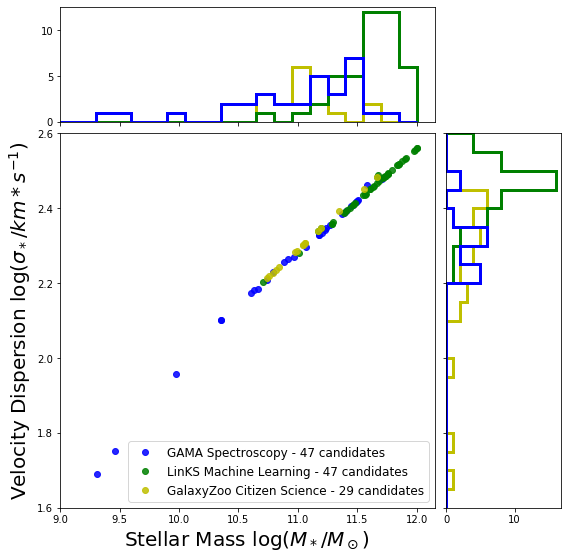

In [15]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plots
axScatter.set_xlim(8.65,12.15)
axScatter.set_ylim(1.5,2.5)

axScatter.plot(spec.lambdar_log_mstar, np.log10(spec.sigma_star), 
               'bo',label='GAMA Spectroscopy - 47 candidates', alpha = 0.85)

axScatter.plot((mac.lambdar_log_mstar), np.log10(mac.sigma_star), 
               'go',label='LinKS Machine Learning - 47 candidates', alpha = 0.85)

axScatter.plot((zoo.lambdar_log_mstar), np.log10(zoo.sigma_star), 
               'yo',label='GalaxyZoo Citizen Science - 29 candidates', alpha = 0.85)

# plot two overlaps
#G136604 = mac[mac.GAMA_ID == 136604]
#G124486 = mac[mac.GAMA_ID == 124486]
#axScatter.plot((G136604.lambdar_log_mstar), np.log(G136604.sigma_star), 'ks', label='Overlap ML/GZ - G136604', fillstyle = 'none')
#axScatter.plot((G124486.lambdar_log_mstar), np.log(G124486.sigma_star), 'kD', label='Overlap ML/GZ - G124486', fillstyle = 'none')

#axScatter.plot(9.5,0.4, 'ko')


axScatter.legend(loc='best', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20

axScatter.axis([9,12.15,1.6,2.6], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $\log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Velocity Dispersion $\log(\sigma_*/km*s^{-1})$', fontsize=20)
    

    
axHisty.hist(np.log10(spec.sigma_star), orientation='horizontal', 
             range=[1.6,2.6], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(np.log10(mac.sigma_star), orientation='horizontal', 
             range=[1.6,2.6], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(np.log10(zoo.sigma_star), orientation='horizontal', 
             range=[1.6,2.6],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist((zoo.lambdar_log_mstar), range=[9,12], 
             bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist((mac.lambdar_log_mstar), range=[9,12], 
             bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist((spec.lambdar_log_mstar), range=[9,12], 
             bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )



plt.savefig(f'{png_path}velocity_dispersion.png')

# Calculate point mass and SIS Einstein radius estimates.
## Point mass:
### $\theta_E = (M_{r_e/2}/(10^{8.09}M_{\odot}))^{1/2}(D_{LS}/(D_LD_S) Mpc)^{1/2}arcsec$
## SIS:
### $\theta_E = (\sigma_{SIS}/(186km/s))^2(D_{LS}/D_S) arcsec$

In [16]:
# POINT MASS
# spec
M = spec.m_half_re
DL = spec.D_lens
DS = spec.D_source

spec['theta_e_pm'] = (M/(10**(8.09)))**(1/2) * ((DS - DL)/(DL*DS))**(1/2)

# mac
M = mac.m_half_re
mac['D_lens'] = cosmo.angular_diameter_distance(mac.z).value
DL = mac.D_lens
DS = 2*mac.D_lens

mac['theta_e_pm'] = (M/(10**(8.09)))**(1/2) * ((DS - DL)/(DL*DS))**(1/2)

# zoo
M = zoo.m_half_re
zoo['D_lens'] = cosmo.angular_diameter_distance(zoo.z).value
DL = zoo.D_lens
DS = 2*zoo.D_lens

zoo['theta_e_pm'] = (M/(10**(8.09)))**(1/2) * ((DS - DL)/(DL*DS))**(1/2)

print(spec.columns,
     mac.columns,
     zoo.columns)

Index(['GAMA_ID', 'RA', 'DEC', 'z_lens', 'D_lens', 'D_source', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error',
       'm_half_re', 'sigma_star', 'theta_e_pm'],
      dtype='object') Index(['GAMA_ID', 'RA', 'DEC', 'score', 'z', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error',
       'm_half_re', 'sigma_star', 'D_lens', 'theta_e_pm'],
      dtype='object') Index(['GAMA_ID', 'RA', 'DEC', 'score', 'z', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error',
       'm_half_re', 'sigma_star', 'D_lens', 'theta_e_pm'],
      dtype='object')


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


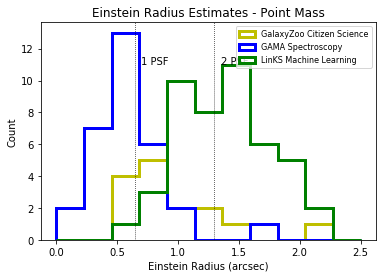

In [17]:
# Histogram of Einstein Radii
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("Einstein Radius Estimates - Point Mass")
plt.hist(zoo.theta_e_pm,bins=11,range=[0.0,2.5],color='y',label='GalaxyZoo Citizen Science', histtype = 'step', linewidth=3)
plt.hist(spec.theta_e_pm,bins=11,range=[0.0,2.5],color='b',label='GAMA Spectroscopy', histtype = 'step', linewidth=3)
plt.hist(mac.theta_e_pm,bins=11,range=[0.0,2.5],color='g',label='LinKS Machine Learning', histtype = 'step', linewidth=3)
#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)

#plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(0.1, color='k', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 11, '1 PSF')
plt.text(1.35, 11, '2 PSF')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/allmethods_theta_e.png')
#plt.hist(zoo.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='y',label='GalaxyZoo Citizen Science', histtype = 'step', linewidth=3, alpha = 0.2)
#plt.hist(spec.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='b',label='Gama Spectroscopy', histtype = 'step', linewidth=3,  alpha = 0.2)
#plt.hist(mac.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='g',label='LinKS Machine Learning', histtype = 'step', linewidth=3,  alpha = 0.2)
plt.legend(loc='upper right', fontsize=8)

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/theta_e_point_mass_half_re_lensing_mass.png')

# AND things start to make sense again.

In [18]:
# SIS
# spec
sigma = spec.sigma_star
DL = spec.D_lens
DS = spec.D_source

spec['theta_e_sis'] = (sigma / 186)**2 * (DS - DL)/DS

# mac
sigma = mac.sigma_star
DL = mac.D_lens
DS = 2*mac.D_lens

mac['theta_e_sis'] = (sigma / 186)**2 * (DS - DL)/DS

# zoo
sigma = zoo.sigma_star
DL = zoo.D_lens
DS = 2*zoo.D_lens

zoo['theta_e_sis'] = (sigma / 186)**2 * (DS - DL)/DS

print(spec.columns,
     mac.columns,
     zoo.columns)

Index(['GAMA_ID', 'RA', 'DEC', 'z_lens', 'D_lens', 'D_source', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error',
       'm_half_re', 'sigma_star', 'theta_e_pm', 'theta_e_sis'],
      dtype='object') Index(['GAMA_ID', 'RA', 'DEC', 'score', 'z', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error',
       'm_half_re', 'sigma_star', 'D_lens', 'theta_e_pm', 'theta_e_sis'],
      dtype='object') Index(['GAMA_ID', 'RA', 'DEC', 'score', 'z', 'magphys_mstar',
       'lambdar_log_mstar', 'lambdar_mstar', 'lambdar_log_mstar_error',
       'm_half_re', 'sigma_star', 'D_lens', 'theta_e_pm', 'theta_e_sis'],
      dtype='object')


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


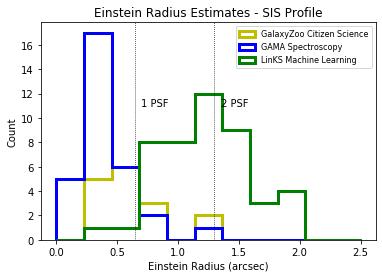

In [19]:
# Histogram of Einstein Radii
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("Einstein Radius Estimates - SIS Profile")
plt.hist(zoo.theta_e_sis,bins=11,range=[0.0,2.5],color='y',label='GalaxyZoo Citizen Science', histtype = 'step', linewidth=3)
plt.hist(spec.theta_e_sis,bins=11,range=[0.0,2.5],color='b',label='GAMA Spectroscopy', histtype = 'step', linewidth=3)
plt.hist(mac.theta_e_sis,bins=11,range=[0.0,2.5],color='g',label='LinKS Machine Learning', histtype = 'step', linewidth=3)
#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)

#plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(0.1, color='k', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 11, '1 PSF')
plt.text(1.35, 11, '2 PSF')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/allmethods_theta_e.png')
#plt.hist(zoo.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='y',label='GalaxyZoo Citizen Science', histtype = 'step', linewidth=3, alpha = 0.2)
#plt.hist(spec.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='b',label='Gama Spectroscopy', histtype = 'step', linewidth=3,  alpha = 0.2)
#plt.hist(mac.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='g',label='LinKS Machine Learning', histtype = 'step', linewidth=3,  alpha = 0.2)
plt.legend(loc='upper right', fontsize=8)

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/theta_e_point_mass_half_re_lensing_mass.png')

# Let's compare the two Einstein radius estimates

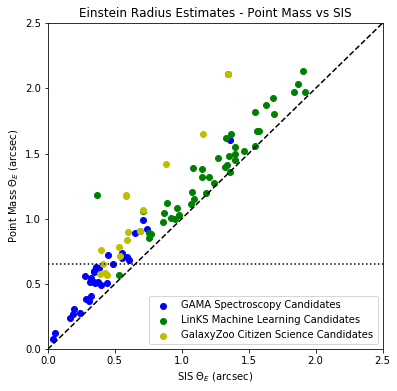

In [111]:
 # plot stellar mass by sfh for lambdar and magphys
x = np.linspace(0, 12, 100)
    
fig = plt.figure(figsize=(6,6))
ax = fig.subplots()
ax.scatter(spec.theta_e_sis,
            spec.theta_e_pm,
          label='GAMA Spectroscopy Candidates',
          color = 'b')
ax.scatter(mac.theta_e_sis,
            mac.theta_e_pm,
           label='LinKS Machine Learning Candidates',
          color = 'g')
ax.scatter(zoo.theta_e_sis,
            zoo.theta_e_pm,
           label='GalaxyZoo Citizen Science Candidates',
          color = 'y')
ax.set_xlabel('SIS $\Theta_E$ (arcsec)')
ax.set_ylabel('Point Mass $\Theta_E$ (arcsec)')
ax.set_ylim(0, 2.5)
ax.set_xlim(0, 2.5)
ax.plot(x, x, 
        color='k',
       linestyle='--')
ax.axhline(0.65,
        linestyle = ':',
          color='k')
ax.legend()
plt.title('Einstein Radius Estimates - Point Mass vs SIS')

#plt.savefig(f'{pdf_path}/theta_e_point_mass_vs_sis.pdf')

# I need to figure out exactly how I will make the Zoo selction from here.
I'm going to go with the 0.65 arcsec cutoff from the point mass estimate.

In [31]:
zoo_theta_e_cut = zoo[zoo.theta_e_pm >= 0.65]
print(len(zoo_theta_e_cut))
print(zoo[zoo.theta_e_pm < 0.65].GAMA_ID)

13
13     363319
14     418788
15    3578853
Name: GAMA_ID, dtype: int64


In [23]:
#spec.to_csv(f'{csv_path}spec_lambdar_revisions_063020.csv')
#mac.to_csv(f'{csv_path}mac_lambdar_revisions_063020.csv')
#zoo_theta_e_cut.to_csv(f'{csv_path}zoo_lambdar_revisions_063020.csv')

# How about the fiber radius mass idea?
$ M_{r_e/2} = 0.0011 * (M_{stellar}) ^ {1.25}$


In [ ]:
# Point Mass
M_stellar = np.linspace(10**(9.5), 10**(12), 1000)
#print(M_stellar)
M = 0.0011 * (M_stellar) ** (1.25)
#print(M)
M_prime_1_2 = 1 / (2*10**(8.09)) * M
M_prime_3_2 = 1 / (3*10**(8.09)) * M
M_prime_5_2 = 1 / ((5/3) * 10**(8.09)) * M
M_prime_4_3 = 1 / (4 * 10**(8.09)) * M
M_prime_5_4 = 1 / (5 * 10** (8.09)) * M

#print(M_prime)
z_1_2 = np.zeros(len(M))
z_3_2 = np.zeros(len(M))
z_5_2 = np.zeros(len(M))
z_4_3 = np.zeros(len(M))
z_5_4 = np.zeros(len(M))

for i in range(len(M)):
    z_1_2[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_1_2[i] * u.Mpc, zmax = 2.0)
    z_3_2[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_3_2[i] * u.Mpc, zmax = 2.0)
    z_5_2[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_5_2[i] * u.Mpc, zmax = 2.0)
    z_4_3[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_4_3[i] * u.Mpc, zmax = 2.0)
    z_5_4[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_5_4[i] * u.Mpc, zmax = 2.0)

In [25]:
# SIS
M_stellar = np.linspace(10**(9.5), 10**(12), 1000)
#print(M_stellar)
M = 0.0011 * (M_stellar) ** (1.25)
#print(M)
M_prime_1_2 = 1 / (2*10**(8.09)) * M
M_prime_3_2 = 1 / (3*10**(8.09)) * M
M_prime_5_2 = 1 / ((5/3) * 10**(8.09)) * M
M_prime_4_3 = 1 / (4 * 10**(8.09)) * M
M_prime_5_4 = 1 / (5 * 10** (8.09)) * M

#print(M_prime)
z_1_2 = np.zeros(len(M))
z_3_2 = np.zeros(len(M))
z_5_2 = np.zeros(len(M))
z_4_3 = np.zeros(len(M))
z_5_4 = np.zeros(len(M))

for i in range(len(M)):
    z_1_2[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_1_2[i] * u.Mpc, zmax = 2.0)
    z_3_2[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_3_2[i] * u.Mpc, zmax = 2.0)
    z_5_2[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_5_2[i] * u.Mpc, zmax = 2.0)
    z_4_3[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_4_3[i] * u.Mpc, zmax = 2.0)
    z_5_4[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_5_4[i] * u.Mpc, zmax = 2.0)

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/astropy/cosmology/funcs.py:124: UserWarning: fval is not bracketed by func(zmin) and func(zmax). This means either
there is no solution, or that there is more than one solution between
zmin and zmax satisfying fval = func(z).
  zmin and zmax satisfying fval = func(z).""")


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


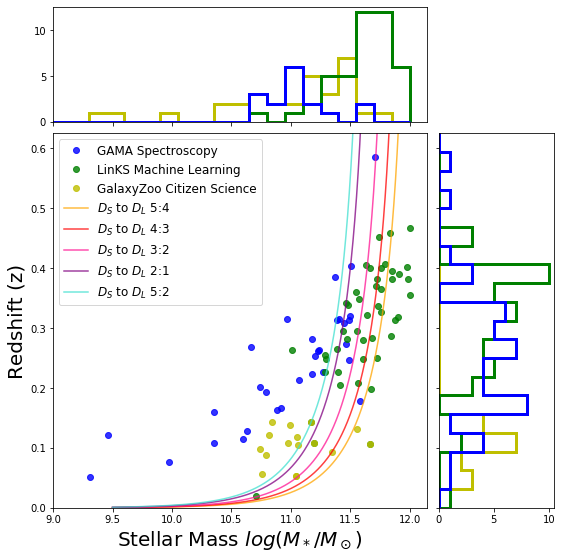

In [27]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plots
axScatter.set_xlim((min(spec.lambdar_log_mstar)-0.5, max(mac.lambdar_log_mstar)+0.5))
axScatter.set_ylim((min(mac.z)-0.05, max(mac.z)+0.05))


axScatter.plot(spec.lambdar_log_mstar, spec.z_lens, 'bo', alpha = 0.8, label='GAMA Spectroscopy')
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(mac.lambdar_log_mstar, mac.z, 'go', alpha = 0.8, label='LinKS Machine Learning')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(zoo.lambdar_log_mstar, zoo.z, 'yo', alpha = 0.8, label='GalaxyZoo Citizen Science')
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals.STELLAR_MASS), decals.Z, 'rs',label='DECaLS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs.STELLAR_MASS), slacs.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm.STELLAR_MASS), s4tm.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')

#text.Annotation('G93310', xycoords='data', xytext=(9.75,0.325), xy=(10.35,0.14), arrowprops=None)
#axScatter.annotate("G93310 - Identified by DECaLS and GalaxyZoo",
 #           xy=(10.475,0.14), xycoords='data',
  #          xytext=(8.75,0.35), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                       connectionstyle="arc3"),
     #       )
#axScatter.annotate("G136604 - Identified by SLACS, Machine Learning, and GalaxyZoo",
 #           xy=(11.46,0.105), xycoords='data',
  #          xytext=(9.0,0.0285), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                        connectionstyle="arc3"),
     #       )
        
# fiber radius mass curves

axScatter.plot(np.log10(M_stellar), z_5_4, 
               color = 'orange', label = '$D_S$ to $D_L$ 5:4', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_4_3, 
               color = 'red', label = '$D_S$ to $D_L$ 4:3', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_3_2, 
               color = 'deeppink', label = '$D_S$ to $D_L$ 3:2', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_1_2, 
               color = 'purple', label = '$D_S$ to $D_L$ 2:1', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_5_2, 
               color = 'turquoise', label = '$D_S$ to $D_L$ 5:2', alpha = 0.75)#, linestyle = '--')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.max_stellar_mass_chabrier)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None, color = 'k',
      #            alpha = 0.5)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.fiber_radius_stellar_mass)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None,
      #            color = 'b',
       #           alpha = 0.5)



axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(spec.STELLAR_MASS)-0.5, max(spec.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([9.0,12.15,0.,0.625], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.z, orientation='horizontal', range=[0,0.625], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac.z, orientation='horizontal', range=[0,0.625], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.625],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(spec.lambdar_log_mstar, range=[9,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(mac.lambdar_log_mstar, range=[9,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(zoo.lambdar_log_mstar, range=[9,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )


plt.savefig(f'{png_path}fiber_radius_mass_point_mass.png')

## $ \sigma =  186 \sqrt{D_S/D_{LS}}$ km/s
## $\sigma(M_*) = \sigma_b * (M_* / M_b)^{\alpha}$
## For z < 0.2: (SDSS fit)
### $\sigma = 10^{2.073} (M_*/ 10^{10.26} M_{\odot})^{\alpha}$
### where $\alpha = 0.403$ if $M_* <= 10^{10.26}$, or $\alpha = 0.293$ otherwise
## For z > 0.2: (SHELS fit)
### $\sigma = 10^{2.071} (M_* / 10^{10.26} M_{\odot})^{0.281}$
# There is no value for M* < 10^10.26 that results in an Einstein radius = 1 arcsec.
# The ratio of D_S/D_LS prevents it.
# For z < 0.2, M* > 10.26,
 $ M_* = 10^{10.26}(\sigma/10^{2.073})^{1/0.293} $
$ M_* = 10^{10.26}(186/10^{2.073}(D_S/D_{LS})^{1/2})^{1/0.293}$
$ M_* = 8.52\times10^{10}(1-1/(D_S/D_L))^{-1/0.586}$
# For z > 0.2,
 $ M_* = 10^{10.26}(\sigma/10^{2.071})^{1/0.281}$
 $ M_* = 10^{10.26}(186/10^{2.071}(D_S/D_{LS})^{1/2})^{1/0.281}$
 $ M_* = 9.26\times10^{10}(1-1/(D_S/D_L))^{-1/0.562}$

In [28]:
# SIS
DS_DL = pd.DataFrame([5/4, 4/3, 3/2, 2/1, 5/2])

z_low = np.linspace(0, 0.2, 100)
z_high = np.linspace(0.2, 0.8, 100)

#ratio = 1/(1-(DS_DL)**(-1)) # = DS/(DSL)
M_low_values = 8.52*10**(10) * (1-1/(DS_DL)) ** (-1/0.586)
M_high_values = 9.26*10**(10) * (1-1/(DS_DL)) ** (-1/0.562)

M_low_5_4 = pd.DataFrame(np.zeros(100))
M_low_5_4[0] = M_low_values[0][0]
M_low_4_3 = pd.DataFrame(np.zeros(100))
M_low_4_3[0] = M_low_values[0][1]
M_low_3_2 = pd.DataFrame(np.zeros(100))
M_low_3_2[0] = M_low_values[0][2]
M_low_2_1 = pd.DataFrame(np.zeros(100))
M_low_2_1[0] = M_low_values[0][3]
M_low_5_2 = pd.DataFrame(np.zeros(100))
M_low_5_2[0] = M_low_values[0][4]

M_high_5_4 = pd.DataFrame(np.zeros(100))
M_high_5_4[0] = M_high_values[0][0]
M_high_4_3 = pd.DataFrame(np.zeros(100))
M_high_4_3[0] = M_high_values[0][1]
M_high_3_2 = pd.DataFrame(np.zeros(100))
M_high_3_2[0] = M_high_values[0][2]
M_high_2_1 = pd.DataFrame(np.zeros(100))
M_high_2_1[0] = M_high_values[0][3]
M_high_5_2 = pd.DataFrame(np.zeros(100))
M_high_5_2[0] = M_high_values[0][4] 

# horizontal line to link the two vertical lines
x_5_4 = np.linspace(M_low_5_4[0][0], M_high_5_4[0][0], 100)
x_4_3 = np.linspace(M_low_4_3[0][0], M_high_4_3[0][0], 100)
x_3_2 = np.linspace(M_low_3_2[0][0], M_high_3_2[0][0], 100)
x_2_1 = np.linspace(M_low_2_1[0][0], M_high_2_1[0][0], 100)
x_5_2 = np.linspace(M_low_5_2[0][0], M_high_5_2[0][0], 100)

z_threshold = pd.DataFrame(np.zeros(100))
z_threshold[0] = 0.2


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0.0, 0.625)

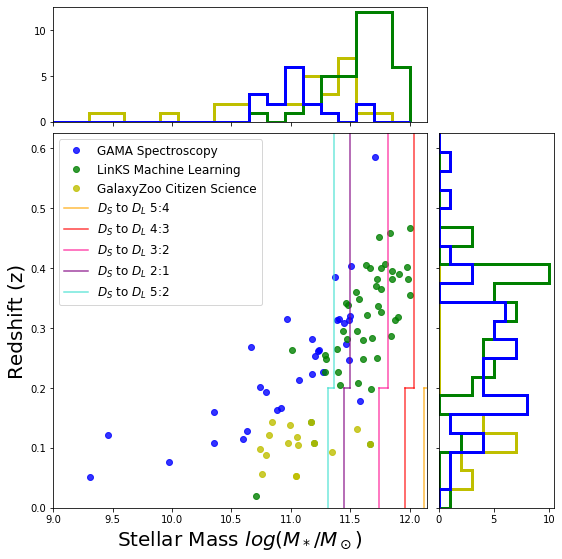

In [30]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plots
axScatter.set_xlim((min(spec.lambdar_log_mstar)-0.5, max(mac.lambdar_log_mstar)+0.5))
axScatter.set_ylim((min(mac.z)-0.05, max(mac.z)+0.05))


axScatter.plot(spec.lambdar_log_mstar, spec.z_lens, 'bo', alpha = 0.8, label='GAMA Spectroscopy')
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(mac.lambdar_log_mstar, mac.z, 'go', alpha = 0.8, label='LinKS Machine Learning')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(zoo.lambdar_log_mstar, zoo.z, 'yo', alpha = 0.8, label='GalaxyZoo Citizen Science')
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals.STELLAR_MASS), decals.Z, 'rs',label='DECaLS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs.STELLAR_MASS), slacs.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm.STELLAR_MASS), s4tm.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')

#text.Annotation('G93310', xycoords='data', xytext=(9.75,0.325), xy=(10.35,0.14), arrowprops=None)
#axScatter.annotate("G93310 - Identified by DECaLS and GalaxyZoo",
 #           xy=(10.475,0.14), xycoords='data',
  #          xytext=(8.75,0.35), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                       connectionstyle="arc3"),
     #       )
#axScatter.annotate("G136604 - Identified by SLACS, Machine Learning, and GalaxyZoo",
 #           xy=(11.46,0.105), xycoords='data',
  #          xytext=(9.0,0.0285), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                        connectionstyle="arc3"),
     #       )
        
# fiber radius mass curves

#axScatter.plot(np.log10(M_stellar), z_5_4, 
#               color = 'orange', label = '$D_S$ to $D_L$ 5:4', alpha = 0.75)#, linestyle = '--')
#axScatter.plot(np.log10(M_stellar), z_4_3, 
#               color = 'red', label = '$D_S$ to $D_L$ 4:3', alpha = 0.75)#, linestyle = '--')
#axScatter.plot(np.log10(M_stellar), z_3_2, 
#               color = 'deeppink', label = '$D_S$ to $D_L$ 3:2', alpha = 0.75)#, linestyle = '--')
#axScatter.plot(np.log10(M_stellar), z_1_2, 
#               color = 'purple', label = '$D_S$ to $D_L$ 2:1', alpha = 0.75)#, linestyle = '--')
#axScatter.plot(np.log10(M_stellar), z_5_2, 
#               color = 'turquoise', label = '$D_S$ to $D_L$ 5:2', alpha = 0.75)#, linestyle = '--')


# Fiber radius  masses at low and high redshifts
axScatter.plot(np.log10(M_low_5_4), z_low,
              color = 'orange', alpha = 0.75, label = '$D_S$ to $D_L$ 5:4')
axScatter.plot(np.log10(M_low_4_3), z_low,
              color = 'red', alpha = 0.75, label = '$D_S$ to $D_L$ 4:3')
axScatter.plot(np.log10(M_low_3_2), z_low,
              color = 'deeppink', alpha = 0.75, label = '$D_S$ to $D_L$ 3:2')
axScatter.plot(np.log10(M_low_2_1), z_low,
               color = 'purple', alpha = 0.75, label = '$D_S$ to $D_L$ 2:1')
axScatter.plot(np.log10(M_low_5_2), z_low,
              color = 'turquoise', alpha = 0.75, label = '$D_S$ to $D_L$ 5:2')
axScatter.plot(np.log10(M_high_5_4), z_high,
              color = 'orange', alpha = 0.75)
axScatter.plot(np.log10(M_high_4_3), z_high,
              color = 'red', alpha = 0.75)
axScatter.plot(np.log10(M_high_3_2), z_high,
              color = 'deeppink', alpha = 0.75)
axScatter.plot(np.log10(M_high_2_1), z_high,
              color = 'purple', alpha = 0.75)
axScatter.plot(np.log10(M_high_5_2), z_high,
              color = 'turquoise', alpha = 0.75)

# line to connect the two
axScatter.plot(np.log10(x_5_4), z_threshold,
              color = 'orange', alpha = 0.75)
axScatter.plot(np.log10(x_4_3), z_threshold,
              color = 'red', alpha = 0.75)
axScatter.plot(np.log10(x_3_2), z_threshold,
              color = 'deeppink', alpha = 0.75)
axScatter.plot(np.log10(x_2_1), z_threshold,
              color = 'purple', alpha = 0.75)
axScatter.plot(np.log10(x_5_2), z_threshold,
              color = 'turquoise', alpha = 0.75)

#axScatter.axvline(np.log10(M_low[0][0]))
#axScatter.axvline(np.log10(M_low[0][1]))
#axScatter.axvline(np.log10(M_low[0][2]))
#axScatter.axvline(np.log10(M_low[0][3]))
#axScatter.axvline(np.log10(M_low[0][4]))

#axScatter.axvline(np.log10(M_high[0][0]),color='k')
#axScatter.axvline(np.log10(M_high[0][1]),color='k')
#axScatter.axvline(np.log10(M_high[0][2]),color='k')
#axScatter.axvline(np.log10(M_high[0][3]),color='k')
#axScatter.axvline(np.log10(M_high[0][4]),color='k')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.max_stellar_mass_chabrier)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None, color = 'k',
      #            alpha = 0.5)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.fiber_radius_stellar_mass)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None,
      #            color = 'b',
       #           alpha = 0.5)



axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(spec.STELLAR_MASS)-0.5, max(spec.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([9.0,12.15,0.0,0.625], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.z, orientation='horizontal', range=[0,0.625], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac.z, orientation='horizontal', range=[0,0.625], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.625],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(spec.lambdar_log_mstar, range=[9,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(mac.lambdar_log_mstar, range=[9,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(zoo.lambdar_log_mstar, range=[9,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )


#plt.savefig(f'{png_path}fiber_radius_mass_sis.png')

# 07/01/20 - Bring in Li-2020

In [86]:
li_in = pd.read_csv('/home/shawn/Desktop/links_autoz/files/csv/li_with_gama_ids_061120.csv')
li_in.columns

Index(['Unnamed: 0', 'name', 'KIDS_ID', 'RA', 'DEC', 'mag', 'mag_err', 'zphot',
       'z_min', 'z_max', 'score', 'rms', 'probability', 's*p/10', 'num_0',
       'GAMA_ID'],
      dtype='object')

In [92]:
li_base = li_in[ ['GAMA_ID']]

li = pd.merge(
    li_base, 
    lambdar_masses, 
    how = 'left', 
    on = 'GAMA_ID')

print(li.columns)
print(li.lambdar_mstar)
# 9 don't have masses.

Index(['GAMA_ID', 'lambdar_log_mstar', 'lambdar_mstar',
       'lambdar_log_mstar_error', 'z'],
      dtype='object')
0     1.711510e+12
1     3.991650e+11
2     4.742041e+11
3     5.995986e+11
4     3.930598e+11
5              NaN
6              NaN
7     5.483881e+11
8              NaN
9              NaN
10    5.090824e+11
11    5.464096e+11
12    5.769029e+11
13    2.866184e+11
14    2.493463e+11
15    1.004834e+12
16             NaN
17    2.816093e+11
18    4.103013e+11
19    2.415500e+11
20    2.405749e+11
21    4.936352e+11
22    2.890772e+11
23             NaN
24    6.437734e+11
25    4.728337e+11
26             NaN
27    2.032105e+11
28    4.457827e+11
29             NaN
30             NaN
31    3.848123e+11
32    1.984693e+11
33    4.327615e+11
34    4.068337e+11
35    1.615416e+11
36    2.599292e+11
37    3.013834e+11
38    6.350415e+11
39    8.609359e+10
40    1.209623e+11
41    2.869918e+11
42    7.035976e+11
43    3.262494e+11
44    5.695480e+10
45    4.579400e+11
46    2.

In [93]:
# add enclosed mass and velocity dispersion
li['m_half_re'] = 0.0011 * (li.lambdar_mstar) ** (1.25)
li['sigma_star'] = calculate_sigmas(z = li.z, mass = li.lambdar_mstar)

# calculate einstein radii
# pm
M = li.m_half_re
li['D_lens'] = cosmo.angular_diameter_distance(li.z).value
DL = li.D_lens
DS = 2*li.D_lens
li['theta_e_pm'] = (M/(10**(8.09)))**(1/2) * ((DS - DL)/(DL*DS))**(1/2)
# sis
sigma = li.sigma_star
DL = li.D_lens
DS = 2*li.D_lens
li['theta_e_sis'] = (sigma / 186)**2 * (DS - DL)/DS

Redshift out of range. nan
Redshift out of range. nan
Redshift out of range. nan
Redshift out of range. nan
Redshift out of range. nan
Redshift out of range. nan
Redshift out of range. nan
Redshift out of range. nan
Redshift out of range. nan


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib

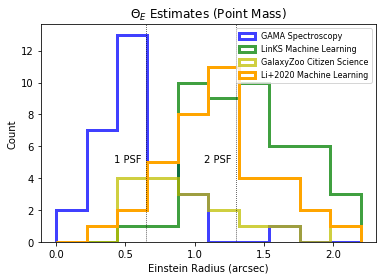

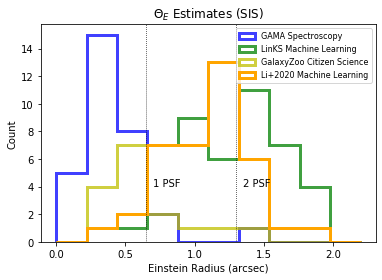

In [99]:
# Histogram of Einstein Radii
# PM
plt.figure()
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("$\Theta_E$ Estimates (Point Mass)")
plt.hist(spec.theta_e_pm,bins=10,range=[0.0,2.2],
         color='b',label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=3, alpha=0.75)
plt.hist(mac.theta_e_pm,bins=10,range=[0.0,2.2],
         color='g',label='LinKS Machine Learning', 
         histtype = 'step', linewidth=3, alpha=0.75)
plt.hist(zoo.theta_e_pm,bins=10,range=[0.0,2.2],
         color='y',label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=3, alpha=0.75)
plt.hist(li.theta_e_pm,bins=10,range=[0.0,2.2],
         color='orange',label='Li+2020 Machine Learning', 
         histtype = 'step', linewidth=3, alpha=1.0)

#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)

#plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(0.1, color='k', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.42, 5, '1 PSF')
plt.text(1.07, 5, '2 PSF')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/allmethods_theta_e.png')
#plt.hist(zoo.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='y',label='GalaxyZoo Citizen Science', histtype = 'step', linewidth=3, alpha = 0.2)
#plt.hist(spec.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='b',label='Gama Spectroscopy', histtype = 'step', linewidth=3,  alpha = 0.2)
#plt.hist(mac.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='g',label='LinKS Machine Learning', histtype = 'step', linewidth=3,  alpha = 0.2)
plt.legend(loc='upper right', fontsize=8)

#plt.savefig(f'{pdf_path}theta_e_pm_li_hist.pdf')

# Histogram of Einstein Radii
# SIS
plt.figure()
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("$\Theta_E$ Estimates (SIS)")

plt.hist(spec.theta_e_sis,bins=10,range=[0.0,2.2],
         color='b',label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=3, alpha=0.75)
plt.hist(mac.theta_e_sis,bins=10,range=[0.0,2.2],
         color='g',label='LinKS Machine Learning', 
         histtype = 'step', linewidth=3, alpha=0.75)
plt.hist(zoo.theta_e_sis,bins=10,range=[0.0,2.2],
         color='y',label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=3, alpha=0.75)
plt.hist(li.theta_e_sis,bins=10,range=[0.0,2.2],
         color='orange',label='Li+2020 Machine Learning', 
         histtype = 'step', linewidth=3, alpha=1.0)
#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)

#plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(0.1, color='k', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 4, '1 PSF')
plt.text(1.35, 4, '2 PSF')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/allmethods_theta_e.png')
#plt.hist(zoo.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='y',label='GalaxyZoo Citizen Science', histtype = 'step', linewidth=3, alpha = 0.2)
#plt.hist(spec.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='b',label='Gama Spectroscopy', histtype = 'step', linewidth=3,  alpha = 0.2)
#plt.hist(mac.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='g',label='LinKS Machine Learning', histtype = 'step', linewidth=3,  alpha = 0.2)
plt.legend(loc='upper right', fontsize=8)

#plt.savefig(f'{pdf_path}theta_e_sis_li_hist.pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib

(0.0, 0.625)

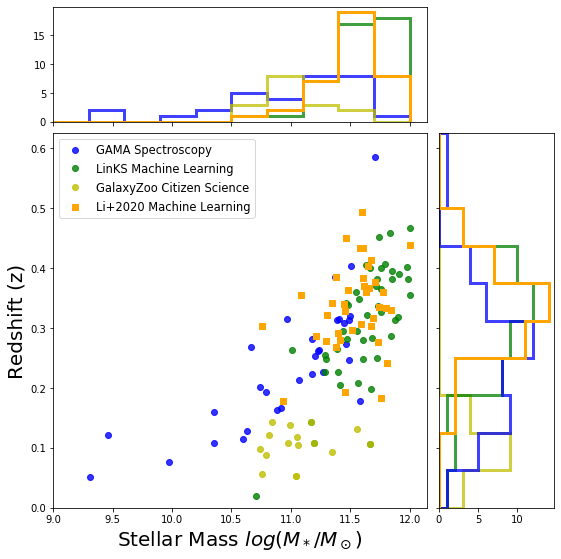

In [109]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plots
#axScatter.set_xlim((min(zoo.lambdar_log_mstar)-0.5, max(np.log10(mac.STELLAR_MASS))+0.5))
#axScatter.set_ylim((min(mac.Z)-0.05, max(mac.Z)+0.05))
axScatter.plot(spec.lambdar_log_mstar, spec.z_lens, 
               'bo', alpha = 0.8, label='GAMA Spectroscopy', 
               zorder=1)
axScatter.plot(mac.lambdar_log_mstar, mac.z, 
               'go', alpha = 0.8, label='LinKS Machine Learning', 
               zorder=2)
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(zoo.lambdar_log_mstar, zoo.z, 
               'yo', alpha = 0.8, label='GalaxyZoo Citizen Science', 
               zorder=3)
axScatter.scatter(li.lambdar_log_mstar, li.z, 
               marker='s', color='orange', alpha = 1.0, label='Li+2020 Machine Learning',
                 zorder=4)

#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals_gama.STELLAR_MASS), decals_gama.Z, 
#               'rs',label='DECaLS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs_gama.STELLAR_MASS), slacs_gama.Z, 
#               'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm_gama.STELLAR_MASS), s4tm_gama.Z, 
#               'ms',label='S4TM - 1 candidate', fillstyle = 'none')

#text.Annotation('G93310', xycoords='data', xytext=(9.75,0.325), xy=(10.35,0.14), arrowprops=None)



axScatter.legend(loc='upper left', numpoints=1, fontsize = 11.5)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.max_stellar_mass_chabrier)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None)

#axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:

#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(spec.STELLAR_MASS)-0.5, max(spec.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([9.0,12.15,0.,0.625], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.z, orientation='horizontal', range=[0,0.625], 
             bins=10,color='y', histtype = 'step', linewidth=3, alpha=0.75)
axHisty.hist(mac.z, orientation='horizontal', range=[0,0.625], 
             bins=10,color='g', histtype = 'step', linewidth=3, alpha=0.75)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.625],  
             bins=10,color='b',  histtype = 'step', linewidth=3, alpha=0.75)
axHisty.hist(li.z, orientation='horizontal', range=[0,0.625],  
             bins=10,color='orange',  histtype = 'step', linewidth=3, alpha=1.0)
    
axHistx.hist(spec.lambdar_log_mstar, range=[9,12], 
             bins=10,color='b', histtype = 'step', linewidth=3, alpha=0.75)
axHistx.hist(mac.lambdar_log_mstar, range=[9,12], 
             bins=10,color='g', histtype = 'step', linewidth=3, alpha=0.75)
axHistx.hist(zoo.lambdar_log_mstar, range=[9,12], 
             bins=10,color='y', histtype = 'step', linewidth=3, alpha=0.75)
axHistx.hist(li.lambdar_log_mstar, range=[9,12],  
             bins=10, color='orange',  histtype = 'step', linewidth=3, alpha=1.0)

axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig(f'{pdf_path}big_plot_li.pdf')

In [96]:
#li.to_csv(f'{csv_path}li_lambdar.csv')

In [104]:
li.z.mean()

0.33318177